In [1]:
import os

REPO_ROOT = os.environ.get("REPO_ROOT")

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(f'{REPO_ROOT}/common/science.mplstyle')
algo_names = ["soft", "broad", "precise", "mixed", "uniform", "static"]
colors = ["#a92be2", "#004080", "#008000", "#15b2a8", "#FA0053", "#FF512E"]
markers = ["^", "<", ">", "v", "o", "."]

## Main experiments plots

In [5]:
PATH = f"{REPO_ROOT}/validation_results/validation_results_decay"

In [6]:
cols = ["Regime", "i", "MSE", "nRMSE", "Max", "Min", "Std", "Mean", "p90", "p75", "p50", "p25", "p10", "PDE"]
data = pd.read_csv(f"{PATH}/combined_validation_results.csv", header=0, index_col=False, names=cols)

In [7]:
data.iloc[:, 0] = data.Regime.map(lambda x: x.split("_")[0] if "no_resampling" not in x else "static")

In [8]:
to_name = {
    "kdv": "KdV",
    "ks": "KS",
    "cons": "KS-c"
}
def identifier_to_name(pde_identifier, string=True):
    parts = pde_identifier.split("__")
    pde_type = to_name[parts[0].split("_")[-1]]
    subparts = parts[1].split("_")
    numw = subparts[0][0]
    norm = True if subparts[-3] == "max1" else False
    mode = "default" if subparts[1] == "default" else subparts[2]
    if string:
        return f"{pde_type}, {mode} ({numw} waves{', normalised' if norm else ''})"
    else:
        return pde_type, mode, numw, norm


In [9]:
data

,Regime,i,MSE,nRMSE,Max,Min,Std,Mean,p90,p75,p50,p25,p10,PDE
0,broad,1000,0.000017,2.057254,0.000289,3.889472e-06,0.000010,0.000017,0.000027,0.000019,0.000014,0.000012,0.000010,diff_kdv__2w_x10_easier_max1_1d_x5
1,mixed,1000,0.000011,2.441449,0.000209,2.974807e-06,0.000008,0.000011,0.000017,0.000011,0.000009,0.000007,0.000006,diff_kdv__2w_x10_easier_max1_1d_x5
2,static,1000,0.000019,2.388939,0.001205,2.735450e-06,0.000036,0.000019,0.000029,0.000018,0.000014,0.000011,0.000006,diff_kdv__2w_x10_easier_max1_1d_x5
3,precise,1000,0.000011,2.088955,0.000573,2.216574e-06,0.000015,0.000011,0.000017,0.000011,0.000008,0.000006,0.000005,diff_kdv__2w_x10_easier_max1_1d_x5
4,soft,1000,0.000011,2.121551,0.000141,2.843661e-06,0.000008,0.000011,0.000017,0.000012,0.000009,0.000007,0.000006,diff_kdv__2w_x10_easier_max1_1d_x5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,mixed,4000,0.000061,1.956411,0.013882,1.353186e-06,0.000174,0.000061,0.000108,0.000085,0.000058,0.000009,0.000005,diff_ks__3w_x07_harder_max1_1d_x5
272,static,4000,0.000082,1.671586,0.044673,1.631765e-06,0.000664,0.000081,0.000109,0.000078,0.000055,0.000008,0.000004,diff_ks__3w_x07_harder_max1_1d_x5
273,precise,4000,0.000056,1.518536,0.016008,2.042444e-06,0.000200,0.000056,0.000096,0.000075,0.000053,0.000011,0.000007,diff_ks__3w_x07_harder_max1_1d_x5
274,soft,4000,0.000054,1.770515,0.013323,6.969918e-07,0.000159,0.000054,0.000096,0.000074,0.000050,0.000005,0.000002,diff_ks__3w_x07_harder_max1_1d_x5


In [10]:
pde_total = data.PDE.unique()
pde_groups = [[pde for pde in pde_total if name in pde] for name in ["kdv", "ks__", "ks_cons"]]
num_groups = len(pde_groups)
max_len = max([len(group) for group in pde_groups])

fig_w_inch, fig_h_inch = 2.5, 2

TO_PLOT = [
        ("nRMSE", "nRMSE mean", "rollout_mean"),
        ("Mean", "MSE mean", "mse_mean"),
        ("Max", "MSE max", "mse_max"),
        ("Std", "MSE std", "mse_std")
]

for i in range(num_groups):
    for j in range(len(pde_groups[i])):
        pde = pde_groups[i][j]
        for (col, lab, name) in TO_PLOT:
            fig, ax = plt.subplots(1, 1, figsize=(fig_w_inch, fig_h_inch), layout="constrained")
            sns.pointplot(data.loc[data.PDE == pde],
                        x="i", y=col, hue="Regime", hue_order=algo_names,
                        ax=ax, legend="brief", palette=colors, 
                        markers=markers, linewidth=0.7, markersize=4, markeredgewidth=0.1, 
                        markeredgecolor="black")
            sns.move_legend(ax, "upper right", title="Regime", title_fontsize=4, fontsize=4)
            ax.set_title(identifier_to_name(pde))
            ax.set_xlabel("Iteration")
            ax.set_ylabel(lab)
            ax.grid(True, "major", alpha=0.5)
            plt.savefig(f"{PATH}/{pde}/{name}_stats.pdf", bbox_inches="tight")
            plt.close(fig)
        

### Table of selected model iteration

In [14]:
data_new = data.copy()
data_new["PDE Type"], data_new["mode"], data_new["k"], data_new["normalised"] = \
    zip(*data_new.PDE.map(lambda x: identifier_to_name(x, string=False)))
data_new.drop(["PDE", "Min", "p90", "p75", "p50", "p25", "p10", "MSE"], axis=1, inplace=True)

tmp = data_new[data_new.i==2000].groupby(["PDE Type", "mode", "k", "normalised", "Regime"]).agg(lambda x: x).drop(["i"], axis=1).map(lambda x: f"{x:.1e}".replace("e+00", "").replace("e-0", "e-").replace("e+0", "e+"))

In [15]:
tmp.to_csv("pde_stats_2k.csv")

In [16]:
tmp.T.loc[:, 'KS-c'].loc[:, ["easier"]]

mode        easier                                                          \
k                2                                                           
normalised   False                                           True            
Regime       broad   mixed precise    soft  static uniform   broad   mixed   
nRMSE          1.4     1.5     1.3     1.3     1.1     1.2     2.0     1.6   
Max         2.3e-2  2.4e-2  3.0e-2  2.9e-2  7.6e-2  5.6e-2  2.0e-1  2.0e-1   
Std         4.0e-4  4.4e-4  5.4e-4  6.7e-4  1.7e-3  1.2e-3  1.1e-2  9.7e-3   
Mean        1.6e-4  1.6e-4  1.5e-4  3.1e-4  3.4e-4  2.4e-4  2.7e-3  2.2e-3   

mode                                        
k                                           
normalised                                  
Regime     precise    soft  static uniform  
nRMSE          1.8     1.8     1.7     1.7  
Max         2.1e-1  2.0e-1  2.2e-1  1.9e-1  
Std         1.1e-2  1.2e-2  1.2e-2  1.1e-2  
Mean        2.5e-3  2.9e-3  3.1e-3  2.6e-3

In [17]:
tmp.T.loc[:, 'KS'].loc[:, "default"]

k                2                                                          \
normalised   False                                           True            
Regime       broad   mixed precise    soft  static uniform   broad   mixed   
nRMSE          2.9     2.4     2.2     1.9     2.6     2.0     2.0     2.3   
Max         5.5e-4  4.6e-4  1.6e-3  6.0e-4  6.8e-3  7.1e-3  4.6e-4  1.0e-3   
Std         4.0e-5  4.4e-5  6.2e-5  4.2e-5  1.3e-4  1.3e-4  2.3e-5  2.0e-5   
Mean        8.8e-5  6.0e-5  8.6e-5  7.9e-5  5.6e-5  5.2e-5  1.8e-5  2.0e-5   

k                           ...       3                                  \
normalised                  ...   False                           True    
Regime     precise    soft  ... precise    soft  static uniform   broad   
nRMSE          2.3     2.5  ...     2.3     2.3     1.3     1.8     1.3   
Max         5.7e-4  6.3e-4  ...  1.6e-3  1.3e-3  3.8e-2  3.2e-2  7.0e-3   
Std         2.1e-5  2.3e-5  ...  3.0e-5  3.1e-5  4.7e-4  3.7e-4  6.7e-5   
Mean        1.6e-5  3.2e-5  ...  5.5e-5  7.6e-5  2.3e-4  5.9e-5  2.9e-5   

k                                                   
normalised                                          
Regime       mixed precise    soft  static uniform  
nRMSE          2.0     2.3     2.3     1.6     2.1  
Max         8.1e-3  8.2e-3  9.5e-3  1.4e-2  1.3e-2  
Std         8.5e-5  7.9e-5  9.1e-5  1.6e-4  1.6e-4  
Mean        1.6e-5  1.7e-5  1.1e-5  2.0e-5  3.4e-5  

[4 rows x 24 columns]

In [18]:
tmp.T.loc[:, 'KS'].loc[:, "harder"].loc[:, "2"]

normalised   False                                           True           \
Regime       broad   mixed precise    soft  static uniform   broad   mixed   
nRMSE          1.8     1.7     1.6     1.8     1.8     1.7     2.0     2.3   
Max         2.6e-1  3.3e-1  3.2e-1  3.6e-1  3.7e-1  3.6e-1  1.5e-1  2.0e-1   
Std         3.2e-3  5.1e-3  4.7e-3  5.3e-3  6.0e-3  5.8e-3  2.6e-3  3.9e-3   
Mean        3.6e-4  5.2e-4  5.0e-4  5.5e-4  7.1e-4  6.1e-4  3.2e-4  3.6e-4   

normalised                                  
Regime     precise    soft  static uniform  
nRMSE          2.1     1.9     1.7     1.8  
Max         1.8e-1  1.6e-1  2.0e-1  2.0e-1  
Std         3.3e-3  2.8e-3  3.9e-3  3.8e-3  
Mean        3.5e-4  3.0e-4  4.0e-4  4.3e-4

In [19]:
tmp.T.loc[:, 'KS'].loc[:, "harder"].loc[:, "3"]

normalised   False                                           True           \
Regime       broad   mixed precise    soft  static uniform   broad   mixed   
nRMSE          1.1     1.1     1.4     1.1     1.1     1.1     1.7     2.0   
Max         1.9e-2  6.0e-2  6.0e-2  4.8e-2  1.1e-1  7.7e-2  1.2e-2  3.8e-2   
Std         2.7e-4  9.9e-4  9.8e-4  7.3e-4  2.3e-3  1.3e-3  1.7e-4  5.9e-4   
Mean        2.9e-4  2.0e-4  4.6e-4  1.8e-4  2.5e-4  2.5e-4  1.4e-4  1.9e-4   

normalised                                  
Regime     precise    soft  static uniform  
nRMSE          1.9     2.1     1.9     1.8  
Max         4.7e-2  6.1e-2  9.3e-2  8.8e-2  
Std         7.2e-4  1.0e-3  1.8e-3  1.6e-3  
Mean        1.2e-4  1.7e-4  2.2e-4  2.1e-4

In [20]:
tmp.T.loc[:, 'KdV']

mode        easier                                          harder          \
k                2                                               2           
normalised    True                                            True           
Regime       broad   mixed precise    soft  static uniform   broad   mixed   
nRMSE          1.2     2.0     1.3     1.9     2.1     1.7     1.4     1.5   
Max         1.6e-4  7.0e-5  1.9e-4  7.3e-5  6.0e-4  6.3e-4  5.4e-5  5.6e-5   
Std         1.0e-5  7.4e-6  1.1e-5  3.8e-6  1.2e-5  1.3e-5  4.4e-6  5.4e-6   
Mean        6.7e-5  1.8e-5  4.0e-5  5.9e-6  1.4e-5  6.8e-6  6.4e-6  1.0e-5   

mode                                        
k                                           
normalised                                  
Regime     precise    soft  static uniform  
nRMSE          1.4     1.5     2.0     1.5  
Max         7.7e-5  5.1e-5  6.2e-4  3.3e-4  
Std         7.6e-6  3.0e-6  1.4e-5  8.0e-6  
Mean        1.0e-5  4.4e-6  6.3e-6  1.1e-5

## Random Seeds study

In [ ]:
import tensorflow as tf
import os
main_path = f"{REPO_ROOT}/experiments/random_seed_set/"

all_events_label_path = []
studies = [x for x in os.listdir(main_path) if "diff" in x and os.path.isdir(os.path.join(main_path, x))]
studies_dir = [os.path.join(main_path, study, "100BUF_10WM__2TD_8CL/UNet_6_5_relu__decaylr1e-3_1e-4_5000__B256__T75p")  for study in studies ]
#methods = ["broad", "mixed", "uniform", "no_resampling"]
for i, study_dir in enumerate(studies_dir):
    try:
        methods = os.listdir(study_dir)
    except FileNotFoundError:
        print(f"Study directory {study_dir} not found.")
        continue
    methods_dir = [os.path.join(study_dir, method) for method in methods if os.path.isdir(os.path.join(study_dir, method))]
    for j, method_dir in enumerate(methods_dir):
        seeds = os.listdir(method_dir)
        seeds = [seed for seed in seeds if os.path.isdir(os.path.join(method_dir, seed))]
        for seed in seeds:
            path_to_tensorboard = os.path.join(method_dir, seed) + \
                                  "/tensorboard/gpu_0/"
            event = os.listdir(path_to_tensorboard)
            if len(event) != 0:
                event_path = os.path.join(path_to_tensorboard, event[0])
                event = (studies[i], methods[j], seed)
            all_events_label_path.append((event, event_path))


In [23]:
all_events_label_path = sorted(all_events_label_path, key=lambda x: (x[0][0], x[0][1], x[0][2]))

In [ ]:
all_csvs = []
for i in range(len(all_events_label_path)):
    print(f"Processing {i + 1}/{len(all_events_label_path)}: {all_events_label_path[i][0]}")
    tags_to_gather = {
        "Loss/train": [],
        "val": {
            "Val_step": [],
            "Loss_valid/mean": [],
            "Loss_valid/rollout_seen_n75_nRMSE": [],
            "Loss_valid/rollout_longer_n100_nRMSE": [],
            "Loss_valid_stats/max": [],
            "Loss_valid_stats/std": []
        }
    }

    events = tf.compat.v1.train.summary_iterator(all_events_label_path[i][1])
    for e in events:
        for v in e.summary.value:
            if v.tag == "Loss/train":
                tags_to_gather["Loss/train"].append((e.step, tf.make_ndarray(v.tensor).item()))
            elif v.tag in tags_to_gather["val"].keys():
                tags_to_gather["val"][v.tag].append(tf.make_ndarray(v.tensor).item())
                if v.tag == "Loss_valid/mean":
                    tags_to_gather["val"]["Val_step"].append(e.step)
    all_lens_val = [len(tags_to_gather["val"][key]) for key in tags_to_gather["val"].keys()]
    df = pd.DataFrame(tags_to_gather["val"])
    df["pde"], df["regime"], df["seed"] = all_events_label_path[i][0]
    all_csvs.append(df)

In [25]:
all_csvs_df = pd.concat(all_csvs, ignore_index=True)
all_csvs_df.to_csv("random_seed_tensorboard_results.csv", index=False)

In [26]:
all_csvs_df['regime'] = all_csvs_df.regime.map(lambda x: x if "no_resampling" not in x else "static")
name_to_color = dict(zip(algo_names, colors))
columns=["Step", "MSE mean", "nRMSE-r75", "nRMSE-r100", "MSE Max", "MSE std", "PDE", "Regime", "Seed"]
all_csvs_df = all_csvs_df.rename(columns={"Val_step": "Step", "Loss_valid/mean": "MSE mean",
                                    "Loss_valid/rollout_seen_n75_nRMSE": "nRMSE-r100",
                                    "Loss_valid/rollout_longer_n100_nRMSE": "nRMSE-r75",
                                    "Loss_valid_stats/max": "MSE Max",
                                    "Loss_valid_stats/std": "MSE std"})


In [27]:
all_csvs_df.rename(columns=dict(regime="Regime", pde="PDE"), inplace=True)
all_csvs_df.head()

,Step,MSE mean,nRMSE-r100,nRMSE-r75,MSE Max,MSE std,PDE,Regime,seed
0,0,0.360905,3.141165,2.355874,0.654073,0.084893,diff_kdv__2w_x10_easier_max1_1d_x5,broad,seed0_0
1,199,0.000613,2.912881,2.184661,0.012112,0.000656,diff_kdv__2w_x10_easier_max1_1d_x5,broad,seed0_0
2,399,0.000109,2.936911,2.202684,0.002246,0.000106,diff_kdv__2w_x10_easier_max1_1d_x5,broad,seed0_0
3,599,0.000042,2.983730,2.237797,0.000380,0.000024,diff_kdv__2w_x10_easier_max1_1d_x5,broad,seed0_0
4,799,0.000023,3.064822,2.298617,0.000150,0.000014,diff_kdv__2w_x10_easier_max1_1d_x5,broad,seed0_0


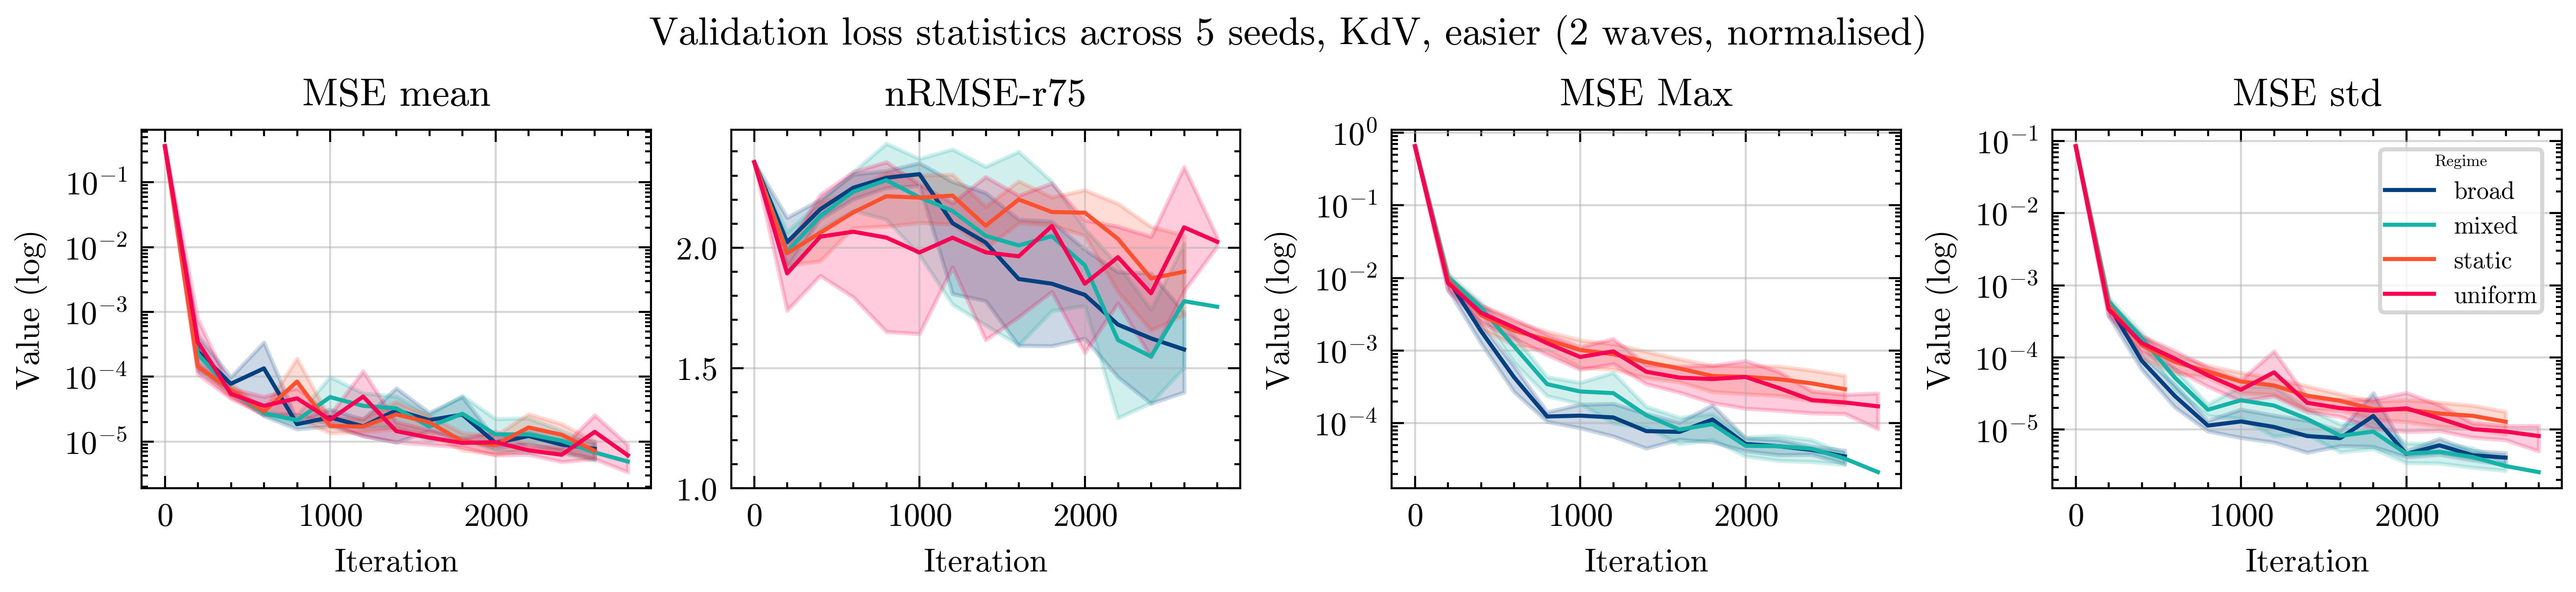

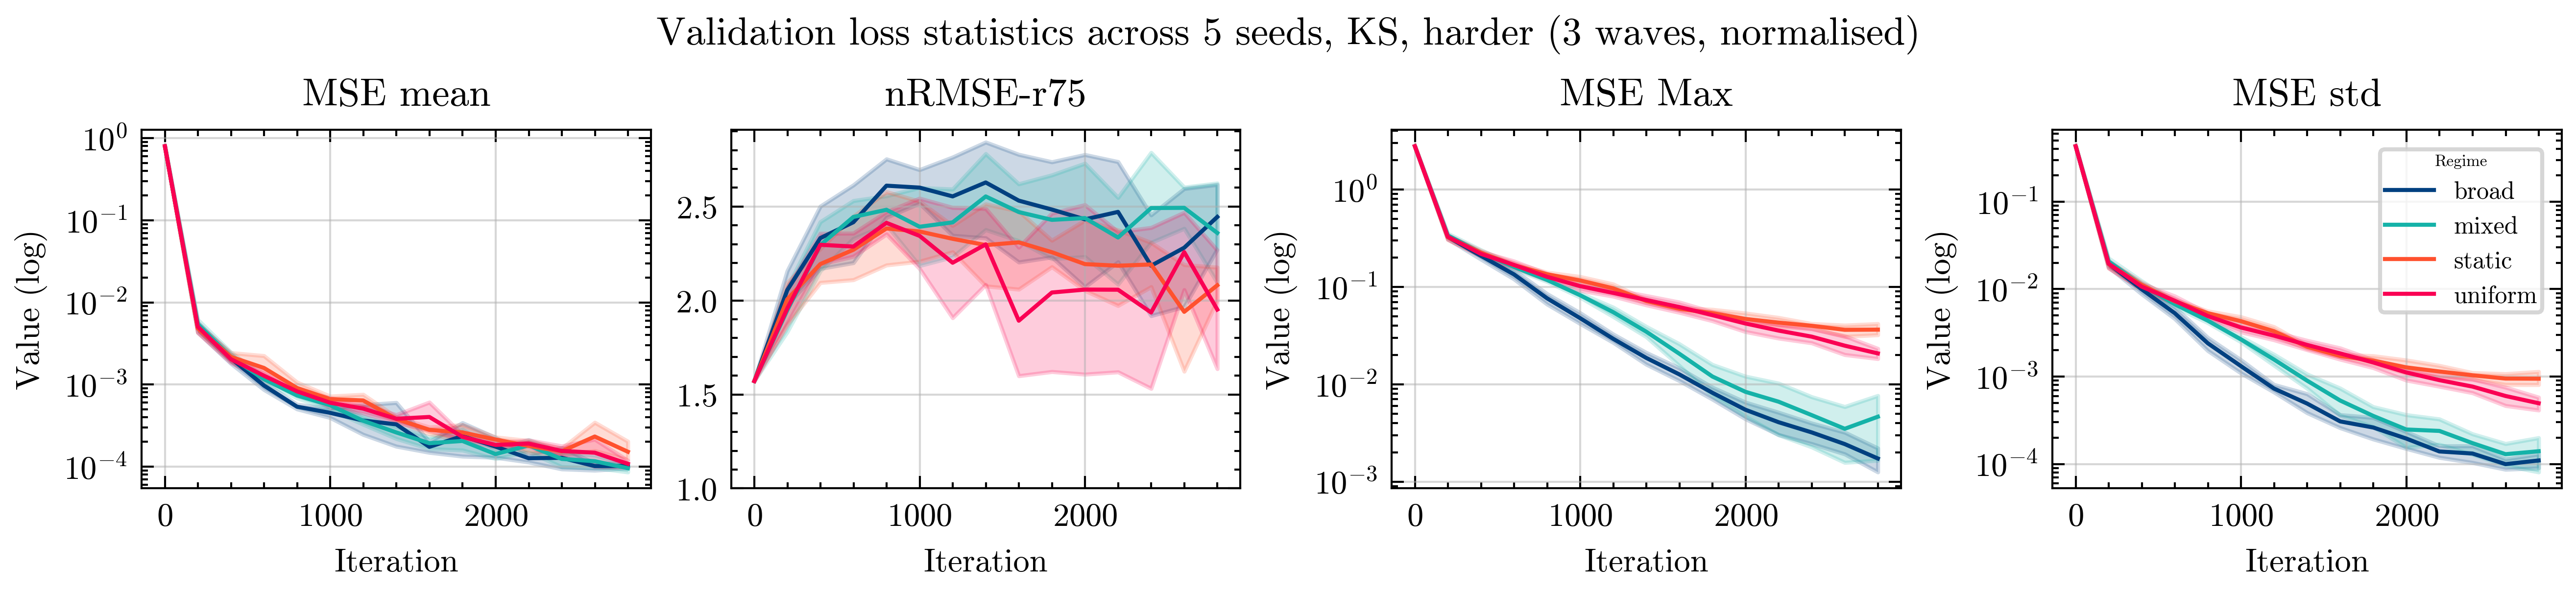

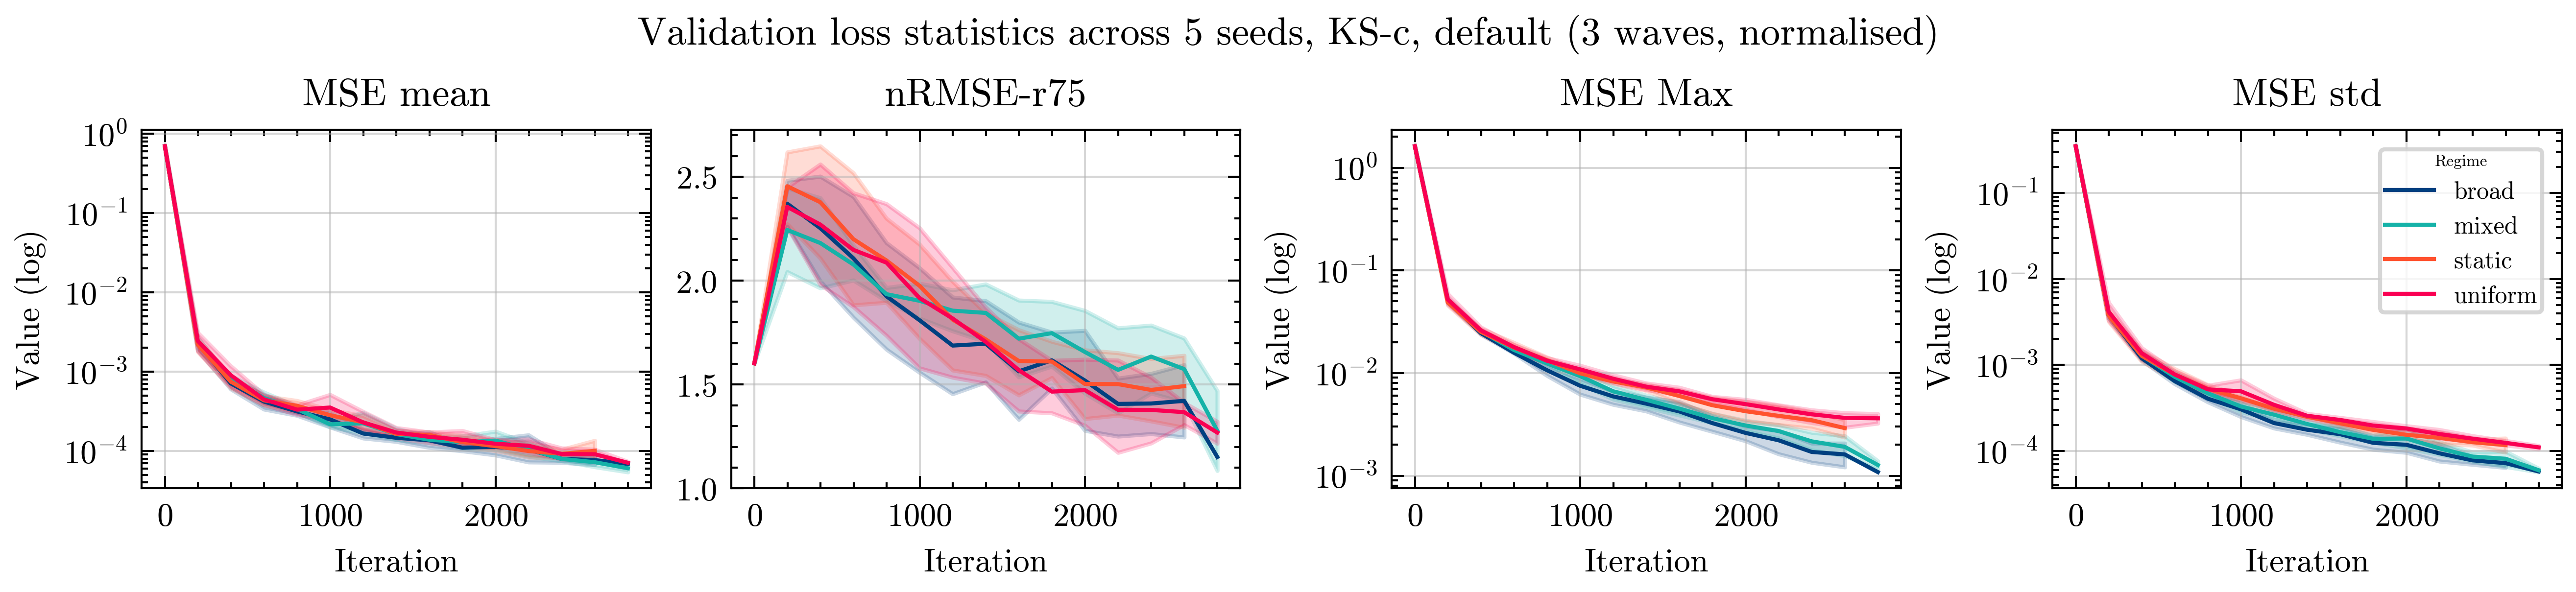

In [28]:
unique_pdes = all_csvs_df.PDE.unique()
metric_list = ["MSE mean","nRMSE-r75", "MSE Max", "MSE std"]	
fig_w_inch, fig_h_inch = 2.5, 2

for pde in unique_pdes:
    fig, axes = plt.subplots(1, len(metric_list), figsize=(fig_w_inch * 3.5, fig_h_inch), layout="constrained")
    fig.suptitle("Validation loss statistics across 5 seeds, " + identifier_to_name(pde))
    for i, metric in enumerate(metric_list, start=1):
        ax = axes[i-1]
        ax.set_title(metric)

        sns.lineplot(all_csvs_df[all_csvs_df.PDE == pde], y=metric, 
                     hue="Regime", x="Step", style="Regime",
                    # hue="regime", x="Val_step", style="regime",
                      ax=ax, legend="brief" if i == 4 else False, 
                      linewidth=1, palette=name_to_color, markers=False, dashes=False)
        if i == 4:
            sns.move_legend(ax, "upper right", title="Regime", title_fontsize=4, fontsize=6)
        if i in [1,3,4]:
            ax.set_yscale("log")
        elif i == 2:
            ax.set_ylim(1.0, None)

        ax.set_xlabel("Iteration")
        ax.set_ylabel("Value" + " (log)" if i in [1,3, 4] else "")
        ax.grid(True, "major", alpha=0.5)
    plt.savefig(f"pde_" + pde + ".pdf", bbox_inches="tight")
    plt.show()
    

## Selected predictions

In [151]:
import matplotlib.colors as mpc

model_i = 4000
pde = "diff_kdv__2w_x10_easier_max1_1d_x5"
# pde = "diff_ks_cons__2w_x19_easier_max1_1d_x5"
# pde = "diff_ks__3w_x07_harder_max1_1d_x5"

path_preds = "{}/validation_results/validation_results_decay/{}/{}/predictions.npy".format(REPO_ROOT, pde, model_i)
path_vals = "{}/validation_results/validation_results_decay/{}/{}/val_samples_to_predict.npy".format(REPO_ROOT, pde, model_i)

preds = np.load(path_preds)
vals = np.load(path_vals)
order_algs = ["broad", "mixed", "no_resampling", "precise", "soft", "uniform"]
reorder = [0,5]
# reorder = [0, 3, 4, 1, 5]

meshes_to_plot = np.vstack([preds[reorder, -1], vals[None, -1]]).squeeze(2).transpose(0, 2, 1)
min_v, max_v = vals[-1].min(), vals[-1].max()
norm = mpc.CenteredNorm(vcenter=0, halfrange=max(abs(min_v), abs(max_v)))


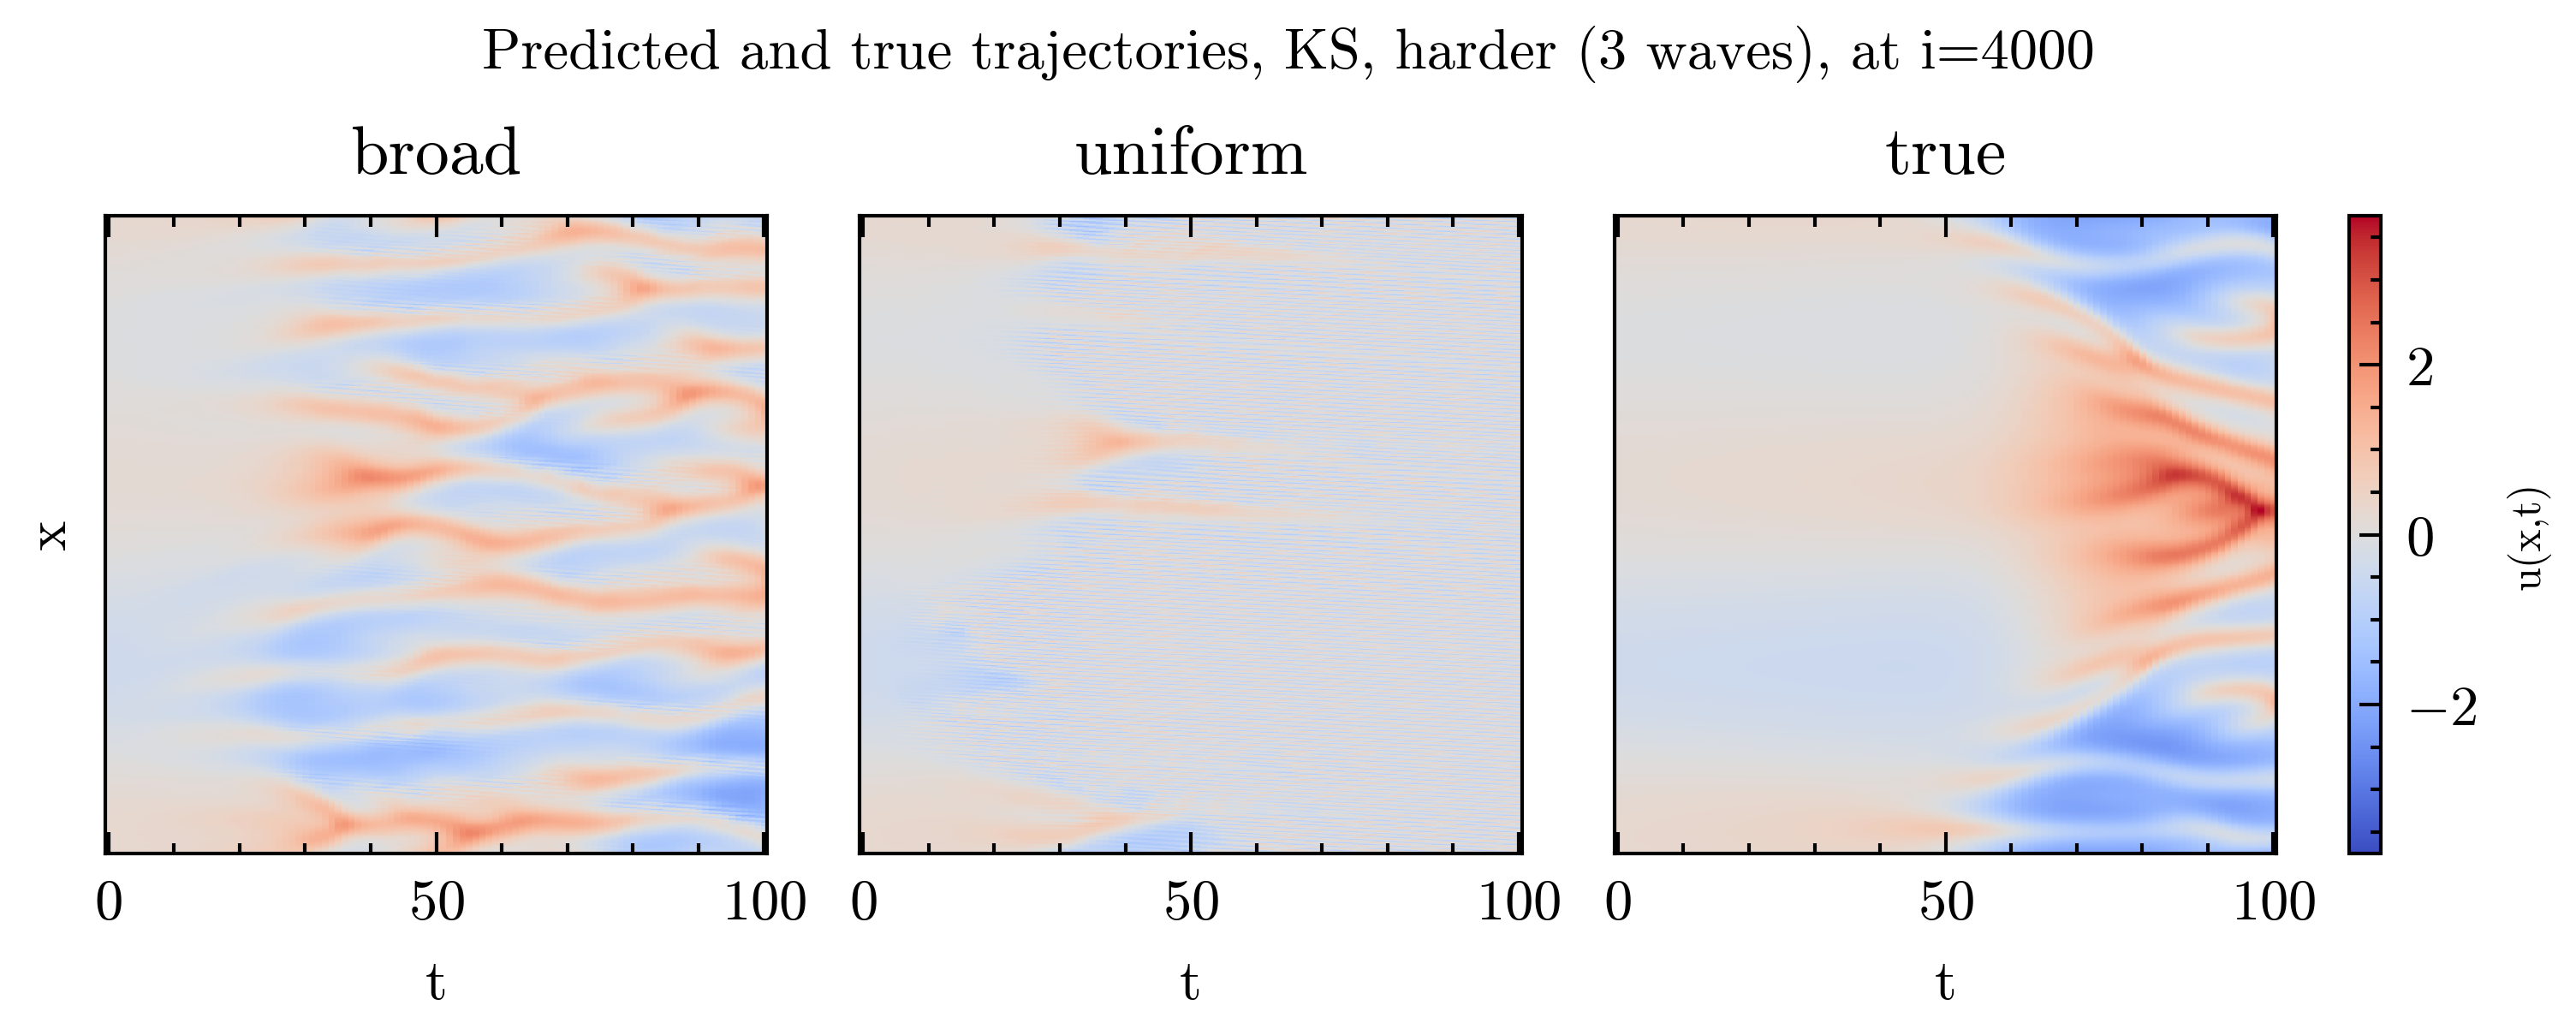

In [152]:

fig, axes = plt.subplots(1, len(reorder)+1, figsize=(fig_w_inch * 2 + 1 * (len(reorder) - 2), fig_h_inch),
                         layout="constrained", sharex=True, sharey=True)
fig.suptitle("Predicted and true trajectories, " + identifier_to_name(pde) + ', at i=' + str(model_i), fontsize=8)
for i in range(len(reorder)+1):
    ax = axes[i]
    ax.set_title(order_algs[reorder[i]] if i < len(reorder) else "true")
    mesh = meshes_to_plot[i]
    im = ax.imshow(mesh, cmap="coolwarm", norm=norm, aspect="auto", interpolation="nearest")
    
    ax.set_xlabel("t")
axes[0].set_ylabel("x")
axes[0].set_yticks([])
cb = fig.colorbar(im, ax=axes[-1])
cb.set_label("u(x,t)", fontsize=6)
plt.savefig("{}/validation_results/validation_results_decay/pde_{}_preds{}{}.pdf".format(REPO_ROOT, pde, model_i, "_small" if len(reorder) < 5 else ""), bbox_inches="tight")
plt.show()
